In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
stock_info = pd.read_csv("/content/Coca-Cola_stock_history (1).csv")
stock_history = pd.read_csv("/content/Coca-Cola_stock_history (1).csv")

# Fix for datetime conversion error
stock_history['Date'] = pd.to_datetime(stock_history['Date'], format='mixed')

# Set seaborn style
sns.set(style="darkgrid")

<ipython-input-3-4e5544b8ba9c>:10: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  stock_history['Date'] = pd.to_datetime(stock_history['Date'], format='mixed')


/usr/local/lib/python3.11/dist-packages/matplotlib/dates.py:449: UserWarning: no explicit representation of timezones available for np.datetime64
  d = d.astype('datetime64[us]')


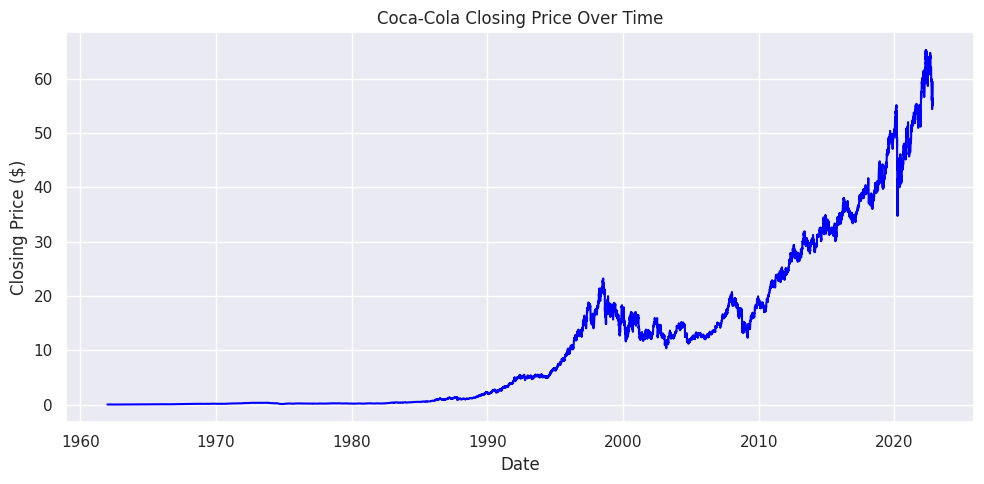

In [4]:
# Plot 1: Closing Price Over Time
plt.figure(figsize=(10, 5))
sns.lineplot(data=stock_history, x='Date', y='Close', color='blue')
plt.title('Coca-Cola Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/dates.py:449: UserWarning: no explicit representation of timezones available for np.datetime64
  d = d.astype('datetime64[us]')


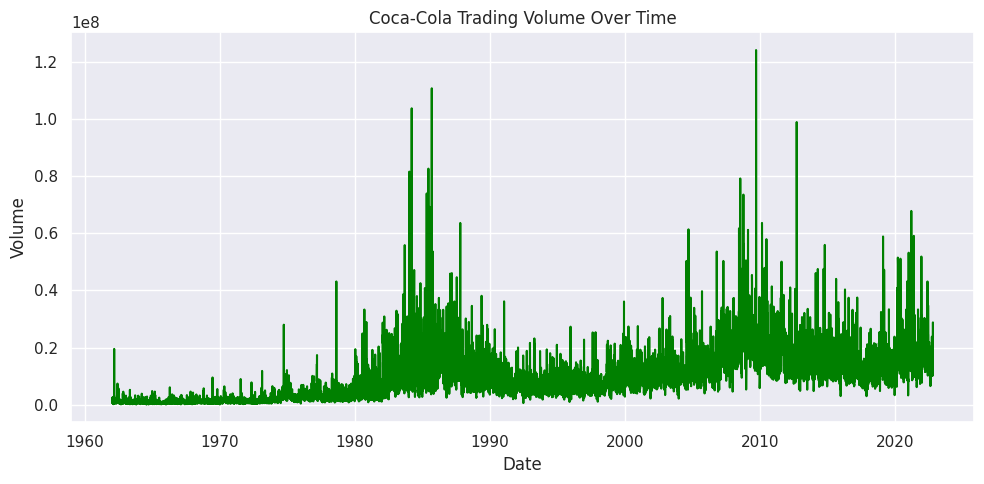

In [5]:
# Plot 2: Volume Over Time
plt.figure(figsize=(10, 5))
sns.lineplot(data=stock_history, x='Date', y='Volume', color='green')
plt.title('Coca-Cola Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/dates.py:449: UserWarning: no explicit representation of timezones available for np.datetime64
  d = d.astype('datetime64[us]')


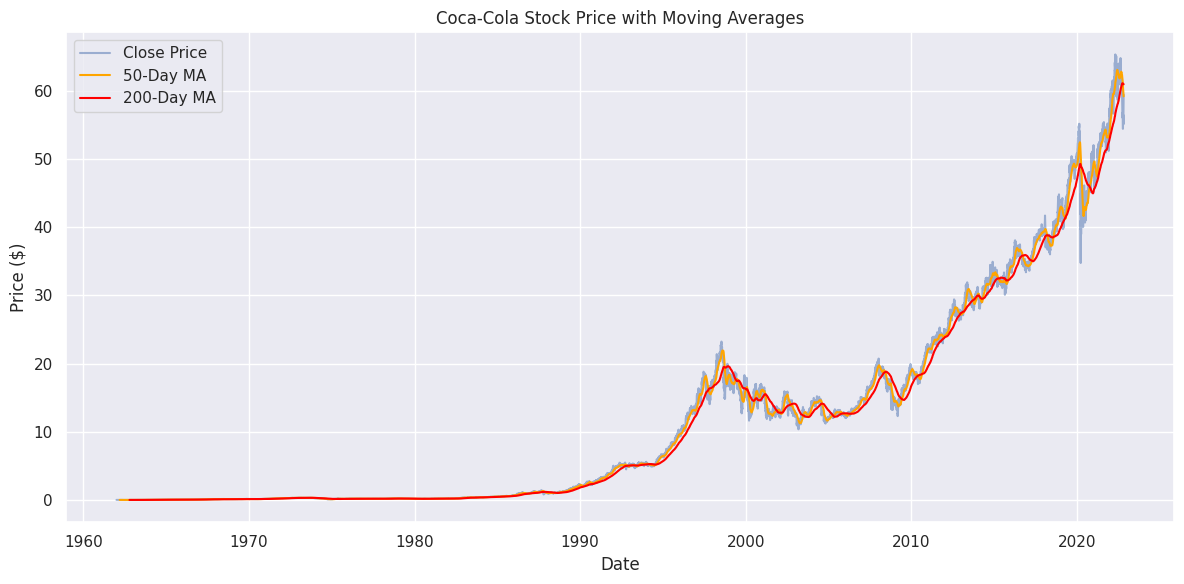

In [6]:
# Plot 3: Moving Average (50-day and 200-day)
stock_history['MA50'] = stock_history['Close'].rolling(window=50).mean()
stock_history['MA200'] = stock_history['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(stock_history['Date'], stock_history['Close'], label='Close Price', alpha=0.5)
plt.plot(stock_history['Date'], stock_history['MA50'], label='50-Day MA', color='orange')
plt.plot(stock_history['Date'], stock_history['MA200'], label='200-Day MA', color='red')
plt.title('Coca-Cola Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.show()

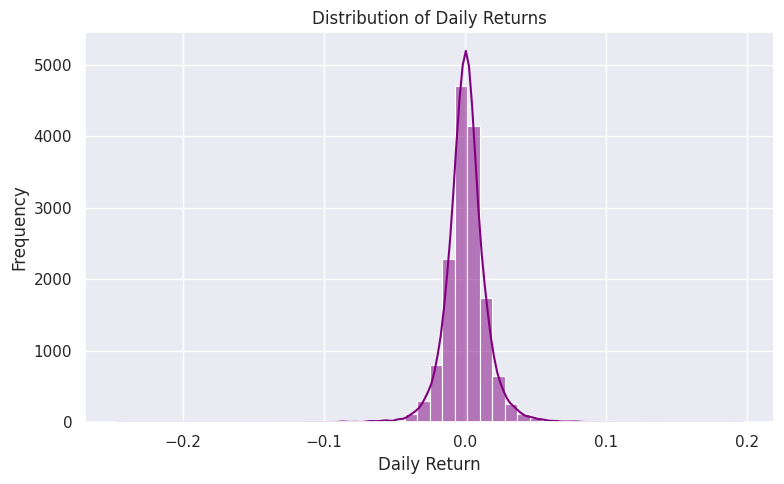

In [7]:
# Plot 4: Daily Returns Distribution
stock_history['Daily Return'] = stock_history['Close'].pct_change()
plt.figure(figsize=(8, 5))
sns.histplot(stock_history['Daily Return'].dropna(), bins=50, color='purple', kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/dates.py:449: UserWarning: no explicit representation of timezones available for np.datetime64
  d = d.astype('datetime64[us]')


NameError: name 'recent_data' is not defined

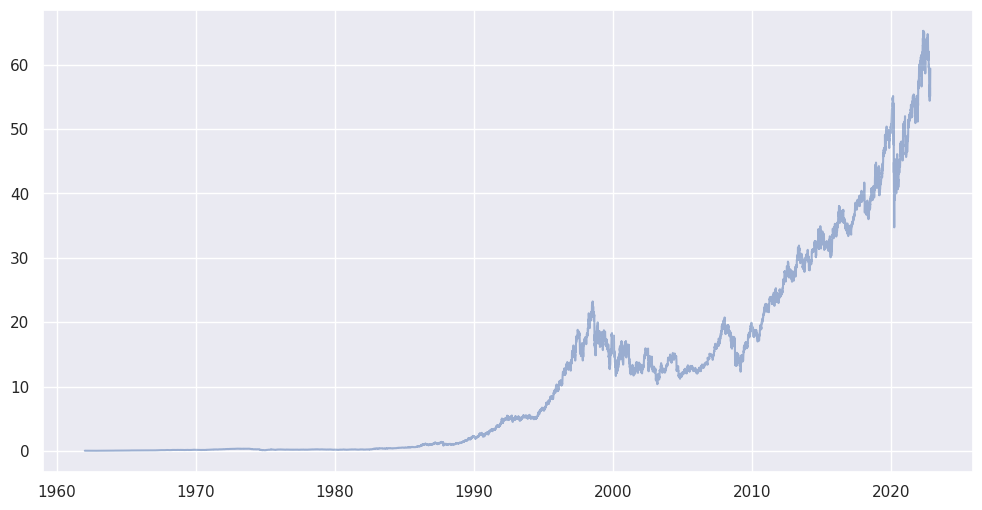

In [11]:
# Plot 1: Compare Closing Price - Full vs. Recent Year
plt.figure(figsize=(12, 6))
plt.plot(stock_history['Date'], stock_history['Close'], label='Full History', alpha=0.5)
plt.plot(recent_data['Date'], recent_data['Close'], label='Recent Year', color='red')
plt.title('Coca-Cola Closing Price: Historical vs Recent Year')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'recent_data' is not defined

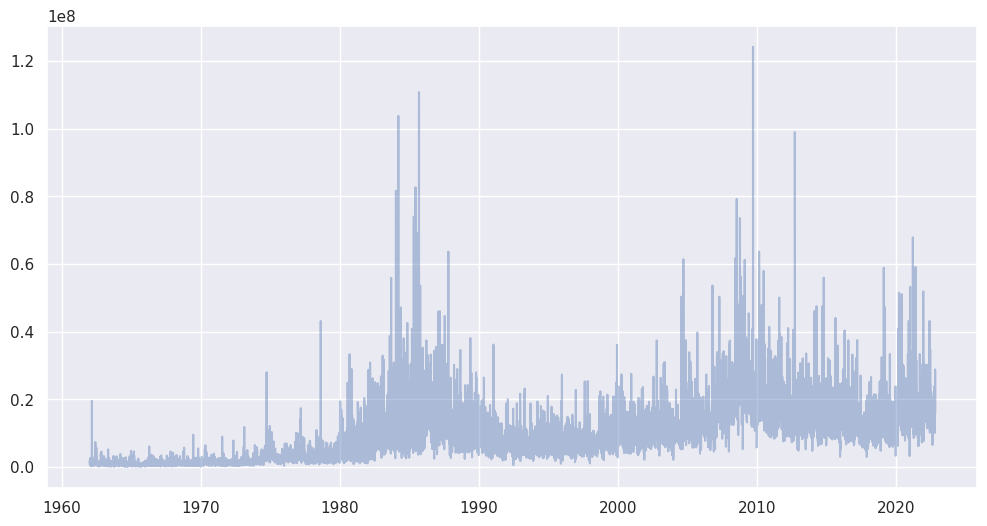

In [12]:
# Plot 2: Compare Volume - Full vs. Recent Year
plt.figure(figsize=(12, 6))
plt.plot(stock_history['Date'], stock_history['Volume'], label='Full History', alpha=0.4)
plt.plot(recent_data['Date'], recent_data['Volume'], label='Recent Year', color='green')
plt.title('Trading Volume: Historical vs Recent Year')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.tight_layout()
plt.show()

# Plot 3: Boxplot of Daily Returns - Full vs Recent
stock_history['Daily Return'] = stock_history['Close'].pct_change()
recent_data['Daily Return'] = recent_data['Close'].pct_change()

combined = pd.concat([
    stock_history.assign(Period='Full History'),
    recent_data.assign(Period='Recent Year')
])

plt.figure(figsize=(8, 5))
sns.boxplot(data=combined, x='Period', y='Daily Return', palette='Set2')
plt.title('Daily Return Distribution: Full History vs Recent Year')
plt.tight_layout()
plt.show()